# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [85]:
# access yelp.csv using a relative path
import pandas as pd
df = pd.read_csv('../2_dataset/yelp.csv')

## Task 1

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [86]:
# show the first review
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [87]:
yelp = pd.read_json('../2_dataset/yelp.json', lines=True)
# cite: https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pythons-pandas

In [88]:
type(yelp.votes[0])

dict

In [89]:
funny = []
useful = []
cool = []
for x in yelp.votes:
    funny.append(x['funny'])
    useful.append(x['useful'])
    cool.append(x['cool'])
    
# Cite: Joseph office hours

In [90]:
yelp['funny'] = funny
yelp['useful'] = useful
yelp['cool'] = cool
# Cite: Joseph office hours

In [91]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,votes,funny,useful,cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}",0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [92]:
# treat stars as a categorical variable and look for differences between groups
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

df = pd.read_csv('../2_dataset/yelp.csv')


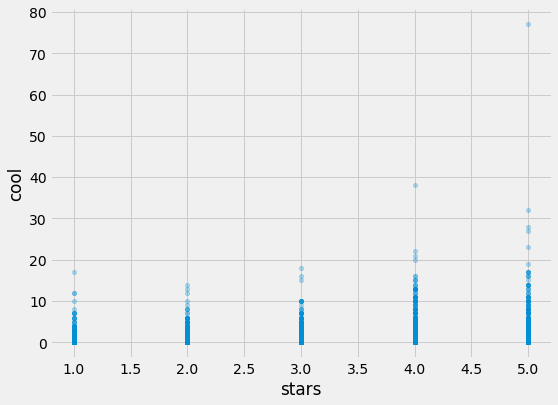

In [93]:
df.plot(kind='scatter', x='stars', y='cool', alpha=0.3)

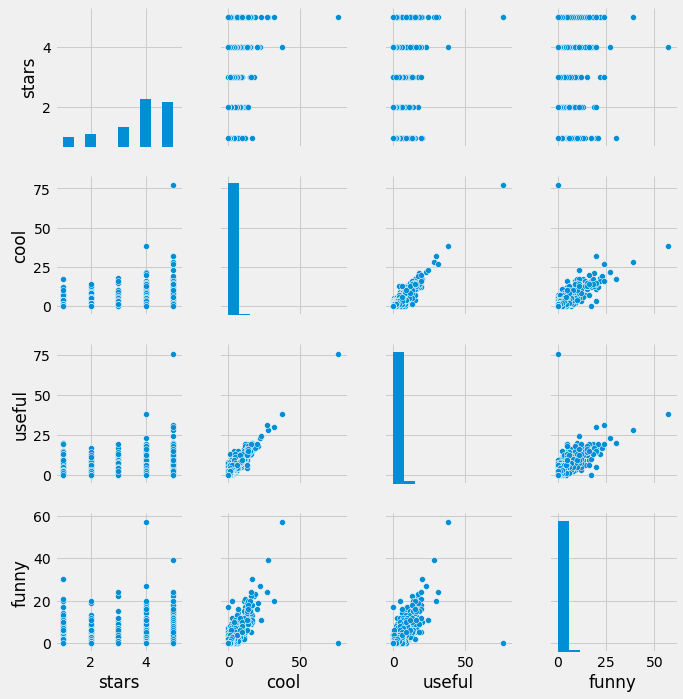

In [94]:
sns.pairplot(df)

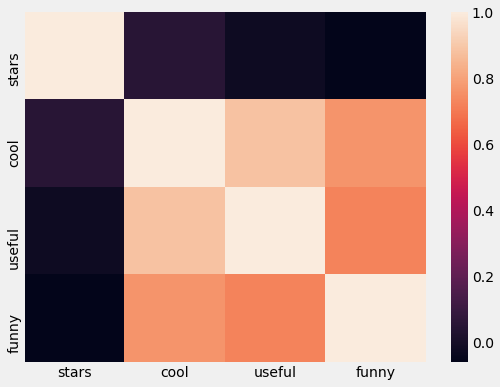

In [95]:
# correlation matrix
sns.heatmap(df.corr())

In [96]:
df.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


There seems to be no meaningful relationship between the number of stars given and the "review" of the review. This makes sense, as Yelp reviews often try too hard to be funny. Kidding aside, I would have trouble understanding how helpful or funny a review is will correlate with the review of an establishment itself. Perhaps a reviewer would be more inclined to leave a more helpful or "cool" review if he or she had a more pleasant experience. The correlation between cool, useful, and funny again seem to be more related to the review itself than the review of the establishment.    

## Task 3

Define cool/useful/funny as the features, and stars as the response.

In [97]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [98]:
features = ['cool','useful','funny']

In [99]:
x=df[features]
y=df.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [100]:
linreg = LinearRegression()
linreg.fit(x,y)

print(linreg.coef_)
print(linreg.intercept_)

[ 0.27435947 -0.14745239 -0.13567449]
3.83989479278


Cool has a positive coefficient, while useful and funny have a negative coefficient. This means that one "cool" review is associated with a 0.27 increase in stars, while one "useful" and "funny" reviews are associated with a -0.15 and -0.14 decrease in stars, respectively. This doesn't make too much intuitive sense to me as to why only cool would have a positive coefficient, while useful and funny would be negative. Perhaps the useful/funny reviews tend to be more critical -- that would make sense for "useful," perhaps not "funny." Looking through the Yelp website quickly, I can't seem to discern a big trend among the three review buttons.

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [101]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [102]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(features):
    x = df[features]
    y = df.stars
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [103]:
# calculate RMSE with all three features
print(train_test_rmse(['cool', 'useful', 'funny']))

1.18136805626


## Task 6

Try removing some of the features and see if the RMSE improves.

In [104]:
print(train_test_rmse(['cool', 'useful']))
print(train_test_rmse(['cool', 'funny']))
print(train_test_rmse(['useful', 'funny']))

1.19931525131
1.19165295307
1.20945321423


The RMSE worsens (i.e. increases) as I remove and add features. This signifies to me that the linear regression model with all three features (cool, useful, funny) does the best in predicting the number of stars an establishment is likely to have, based on the "review" of the Yelp review. 

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [105]:
# new feature: review length (number of characters)
df['length'] = df.text.str.len()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.len.html

In [106]:
# new features: whether or not the review contains 'love' or 'hate'
df['love'] = df.text.str.contains("love",case=False)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html

In [107]:
df['hate'] = df.text.str.contains("hate",case=False)

In [108]:
# add new features to the model and calculate RMSE
def love_hate(row):
    if row["love"] == 1:
        return 1
    elif row["hate"] == 1:
        return 1
    else:
        return 0

df = df.assign(lovehate=df.apply(love_hate, axis=1))

#https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column

In [109]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,love,hate,lovehate
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895,False,False,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349,False,False,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,True,False,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,423,True,False,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,471,False,False,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2102,False,False,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1571,True,False,1
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,276,False,False,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349,False,False,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186,False,False,0


In [110]:
print(train_test_rmse(['cool', 'useful', 'funny','length']))
print(train_test_rmse(['cool', 'useful', 'funny','length','lovehate']))
print(train_test_rmse(['cool', 'useful', 'funny','lovehate']))

1.17417762851
1.16074583342
1.17152656715


My RMSE improves as I add in more features.

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [111]:
# split the data (outside of the function)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111)

In [112]:
# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

In [113]:
# fill the array with the mean of y_test
y_null.fill(y_test.mean())
y_null

array([ 3.764,  3.764,  3.764, ...,  3.764,  3.764,  3.764])

In [114]:
# calculate null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2143739127632807

## Task 9 (Bonus)

Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [22]:
# import and instantiate KNN

In [23]:
# classification models will automatically treat the response value (1/2/3/4/5) as unordered categories

## Task 10 (Bonus)

Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [24]:
# use linear regression to make continuous predictions

In [25]:
# round its predictions to the nearest integer

In [26]:
# calculate classification accuracy of the rounded predictions

## Task 1 (Bonus)

Interact with JSON

In [ ]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary using using json.loads()

In [ ]:
# convert the list of dictionaries to a DataFrame

In [ ]:
# add DataFrame columns for cool, useful, and funny

In [ ]:
# drop the votes column